In [1]:
import pandas as pd
import numpy as np

In [2]:
exames = pd.read_csv('C:/Users/alice/Desktop/banco/StudentsPerformance.csv')
exames.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
exames.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [30]:
exames = exames.rename(columns={'race/ethnicity': 'grupo'})
exames.head()

,gender,grupo,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [34]:
#3
alunos_g =exames['grupo'].value_counts()
alunos_g


group C    319
group D    262
group B    190
group E    140
group A     89
Name: grupo, dtype: int64

In [35]:
#4Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?
exames['gender'].value_counts()
# resposta = feminino

female    518
male      482
Name: gender, dtype: int64

In [17]:
def analise(coluna):
    geral = exames[coluna].describe()
    histo = exames.hist(column=coluna)
    histo
    geral
#nota média dos alunos com escolaridade ate o 2° grau
    G2 = exames[exames['parental level of education'] == 'some college'][coluna]
    media_g2 = G2.mean()
    print(' Informações gerais das notas de', coluna, 'e:',
      geral)
    print('A nota média dos alunos com o 2° de estudo é:', media_g2)

 Informações gerais das notas de math score e: count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64
A nota média dos alunos com o 2° de estudo é: 67.1283185840708


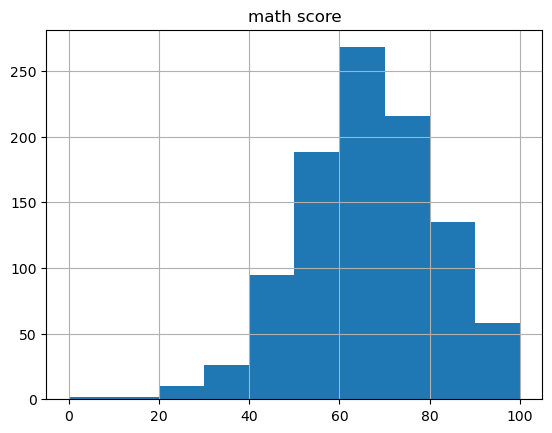

In [18]:
analise('math score')

 Informações gerais das notas de reading score e: count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64
A nota média dos alunos com o 2° de estudo é: 69.46017699115045


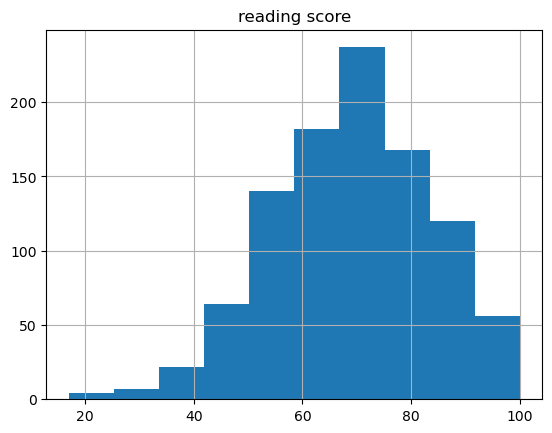

In [19]:
analise('reading score')

 Informações gerais das notas de writing score e: count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing score, dtype: float64
A nota média dos alunos com o 2° de estudo é: 68.84070796460178


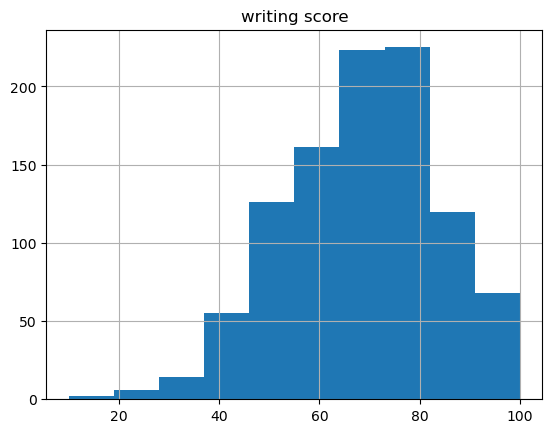

In [20]:
analise('writing score')

In [28]:
# será que completar o curso foi um fator determinante para tirar notas de matemáticas mais altas? para saber isso vou rodar um teste
from scipy import stats
completo = exames[exames['test preparation course'] == 'completed']['math score']
incompleto = exames[exames['test preparation course'] == 'none']['math score']
assis_comp, curt_comp = completo.skew(), incompleto.kurtosis()
assis_in, curt_in = completo.skew(), incompleto.kurtosis()
# assimetria e curtose dentro do intervalo de -2 a 2 indicam distribuição normal, logo o ideal é aplicar um teste t
print('A assimetria dos grupos é:',assis_comp, assis_in)
print('A curtose dos grupos é:',curt_comp, curt_in)
alpha = 0.05 
t_stat, p_value = stats.ttest_ind(completo, incompleto, equal_var=True)
if p_value < alpha:
    print("Há uma diferença estatisticamente significativa entre os grupos.")
else:
    print("Não há uma diferença estatisticamente significativa entre os grupos.")
print(" O valor de p foi:", p_value)


A assimetria dos grupos é: -0.14752292843301784 -0.14752292843301784
A curtose dos grupos é: 0.40132583243646813 0.40132583243646813
Há uma diferença estatisticamente significativa entre os grupos.
 O valor de p foi: 1.5359134607147415e-08


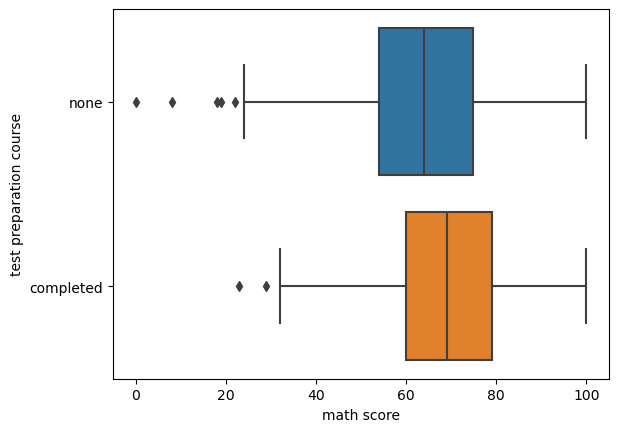

In [72]:
# relação com o curso preparatorio 
nota_curso = sns.boxplot(x = 'math score', y='test preparation course', data=exames)


In [21]:
exames['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64